In [1]:
import csv
import math
import decimal

# constants
p = decimal.Decimal(1 / (16 ** 3) * 0.14)
q = 1 - p

Formula derivation: [「MC」海带生长规律的初步探索与计算](https://www.bilibili.com/read/cv12830269)
![Formula](https://i0.hdslb.com/bfs/article/a850eb3f0fbe2ef73b181e921d8518fdfa5326f4.png)

In [2]:
def efficiency(n:int, h:int) -> decimal.Decimal:
    sum = decimal.Decimal(0)
    for i in range(1, h):
        temp = (h - i) * (h + i -51) * math.comb(n, i) * p**i * q**(n-i)
        sum += temp
    return decimal.Decimal(h / n) + 1 / decimal.Decimal(50 * n) * (sum - h * (h + 1))


In [3]:
# test value
n = 3600
h = 20

print(efficiency(n,h))
print(str(h / n - 1 / (50 * n) * h * (h + 1)))

0.002857521261409761987310047899
0.0032222222222222222


In [4]:
n_range = range(200, 72000, 20)
h_range = [10, 15, 20, 25]

results = []

for n in n_range:
    temp_results = [n]
    for h in h_range:
        temp_results.append(efficiency(n, h))
    results.append(temp_results)
with open('./calculation.csv', 'w', newline='', encoding='UTF-8') as csvfile:
    writer = csv.writer(csvfile) 
    writer.writerow(['n | h'] + list(h_range))
    writer.writerows(results)

In [5]:
import decimal
import csv
import matplotlib.pyplot as plt
import numpy as np

n = []
h = []
eff = {}


with open('./calculation.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    row = next(reader)
    h = row[1:]
    for height in h:
        eff[height] = []
    for row in reader:
        n.append(row[0])
        for i in range(len(row[1:])):
            eff[h[i]].append(row[i + 1])

print(len(n))

3590


[6. 4.]


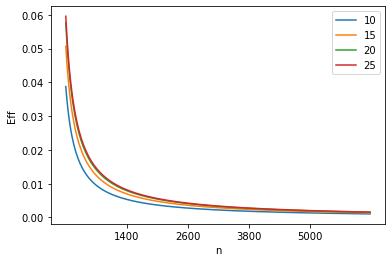

In [7]:
def plot_one(key):
    e = []
    for item in eff[key]:
        e.append(float(item))
    ax.plot(n[0:num], e[0:num], label=key)

num = 300

fig, ax = plt.subplots()
for key in eff.keys():
    plot_one(key)
print(fig.get_size_inches())
fig.set_size_inches(6,4)
ax.set_xticks(n[int(num/5):num:int(num/5)])
ax.set_xlabel('n')
ax.set_ylabel('Eff')
ax.legend()

